## Búsqueda

En esta libreta exploraremos búsqueda en gráficas.

Antes de empezar con búsqueda, debemos pensar en las posibles maneras de expresar una gráfica en la computadora: A veces la tenemos en memoria, a veces no, etc.

Posibles maneras de expresar una gráfica:
1. Una lista de aristas
2. Una matriz de adyacencia
3. Para cada vértice tenemos una manera de encontrar sus vecinos.

Pros y cons:
1. Es sencillo recorrer todas las aristas, ordenarlas, etc. Agregar vértices o aristas es trivial. Quitarlos es muy pesado.
2. Es sencillo saber si dos vértices están conectados o no. Agregar y quitar aristas es trivial. Quitar o agregar vértices es muy pesado. Toma una cantidad cuadrática de memoria.
3. Dependiendo de la estructura de datos que usemos para guardar vecinos qué tan fácil o difícil sea encontrar si dos están conectados, etc. Es fácil encontrar los vecinos de un vértice, y la mayoría de los algoritmos en gráficas requieren esto.


En matemáticas muchas veces vamos a tener gráficas gigantescas en donde más bien podemos saber los "vecinos" de un vértice.

Para empezar, vamos a ver cómo programaríamos un resolvedor de laberintos (medio chafón).

In [1]:
import random

In [2]:
def crear_laberinto(n,m,p=0.25):
    M = [[0]*m for i in range(n)]
    for x in range(n):
        for y in range(m):
            if random.random() < p:
                M[x][y] = 1
    M[0][0] = 0
    M[-1][-1] = 0
    return M

Digamos que queremos llegar de la casilla (0,0) a la casilla (n-1,m-1) (la última).

In [3]:
from copy import deepcopy

In [4]:
def vecinos(M,x,y):
    n,m = len(M), len(M[0])
    candidatos = [(x-1,y), (x+1,y), (x,y-1), (x,y+1)]
    V = []
    for xp,yp in candidatos:
        if not (xp < 0 or yp < 0 or xp>=n or yp >= m):
            if M[xp][yp] == 0:
                V.append((xp,yp))
    return V

In [5]:
def encontrar_camino(M):
    n,m = len(M), len(M[0])
    
    caminotrivial = [(0,0)]
    frontera = [caminotrivial]
    explorados = {(0,0)}
    
    while frontera:
        P = frontera.pop()
        u = P[-1]
        explorados.add(u)
        
        if es_objetivo(M,u): 
            return P
        
        expander_camino(M,P,frontera,explorados)
        
    print("No hay camino!")
    return None

In [6]:
def es_objetivo(M,u):
    n,m = len(M), len(M[0])
    return u == (n-1,m-1)

In [7]:
def expander_camino(M,P,frontera,explorados):
    u = P[-1]
    for v in vecinos(M,*u):
        if v not in explorados:
            Q = deepcopy(P)
            Q.append(v)
            frontera.append(Q)

In [8]:
M=crear_laberinto(10,10,0.25); M

[[0, 0, 1, 0, 0, 0, 0, 1, 1, 0],
 [0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 1, 0, 0, 0, 1],
 [1, 0, 0, 0, 1, 0, 0, 0, 1, 0],
 [0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 1, 1, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 1, 0]]

In [9]:
camino=encontrar_camino(M); camino

[(0, 0),
 (1, 0),
 (2, 0),
 (2, 1),
 (3, 1),
 (3, 2),
 (3, 3),
 (2, 3),
 (2, 4),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (2, 8),
 (2, 7),
 (2, 6),
 (3, 6),
 (3, 7),
 (4, 7),
 (4, 8),
 (4, 9),
 (5, 9),
 (5, 8),
 (5, 7),
 (5, 6),
 (6, 6),
 (6, 7),
 (6, 8),
 (6, 9),
 (7, 9),
 (7, 8),
 (8, 8),
 (8, 9),
 (9, 9)]

In [10]:
def imprimir_camino(M,camino):
    A = deepcopy(M)
    for x,y in camino:
        A[x][y] = 8
    return A

In [11]:
imprimir_camino(M,camino)

[[8, 0, 1, 0, 0, 0, 0, 1, 1, 0],
 [8, 1, 1, 0, 8, 8, 8, 8, 8, 0],
 [8, 8, 1, 8, 8, 1, 8, 8, 8, 1],
 [1, 8, 8, 8, 1, 0, 8, 8, 1, 0],
 [0, 0, 1, 1, 0, 0, 0, 8, 8, 8],
 [0, 1, 0, 0, 1, 1, 8, 8, 8, 8],
 [0, 0, 0, 1, 0, 0, 8, 8, 8, 8],
 [1, 0, 0, 0, 0, 0, 0, 1, 8, 8],
 [0, 0, 0, 0, 0, 0, 0, 1, 8, 8],
 [0, 0, 0, 0, 0, 1, 0, 0, 1, 8]]

## BFS y deque

En el programa anterior, si cambiamos `P = frontera.pop()` por `P = frontera.pop(0)` estaremos haciendo BFS (breadth-first search) en vez de DFS.

PERO hay un problema: pop(0) es extremadamente lento: saca el 0-avo recorriendo todos los demás un espacio en memoria a la izquierda.

Entonces debemos usar otra estructura de datos: `deque` (double ended queue).

In [12]:
from collections import deque

In [13]:
D = deque()

In [14]:
def encontrar_caminoBFS(M):
    n,m = len(M), len(M[0])
    
    caminotrivial = [(0,0)]
    frontera = deque([caminotrivial])
    explorados = {(0,0)}
    
    while frontera:
        P = frontera.popleft()
        u = P[-1]
        explorados.add(u)
        
        if es_objetivo(M,u): 
            return P
        
        expander_camino(M,P,frontera,explorados)
        
    print("No hay camino!")
    return None

In [15]:
M

[[0, 0, 1, 0, 0, 0, 0, 1, 1, 0],
 [0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 1, 0, 0, 0, 1],
 [1, 0, 0, 0, 1, 0, 0, 0, 1, 0],
 [0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 1, 1, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 1, 0]]

In [16]:
camino = encontrar_caminoBFS(M)

In [17]:
imprimir_camino(M,camino)

[[8, 0, 1, 0, 0, 0, 0, 1, 1, 0],
 [8, 1, 1, 0, 0, 0, 0, 0, 0, 0],
 [8, 8, 1, 0, 0, 1, 0, 0, 0, 1],
 [1, 8, 0, 0, 1, 0, 0, 0, 1, 0],
 [8, 8, 1, 1, 0, 0, 0, 0, 0, 0],
 [8, 1, 0, 0, 1, 1, 0, 0, 0, 0],
 [8, 8, 0, 1, 8, 8, 8, 8, 8, 0],
 [1, 8, 8, 8, 8, 0, 0, 1, 8, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 8, 8],
 [0, 0, 0, 0, 0, 1, 0, 0, 1, 8]]

## DFS, recursión, y la callstack (pila de llamadas)

Hay otra manera de programar DFS que a veces es más sencilla: con recursión.

Digamos que tenemos, por ejemplo, un árbol con raíz, y para cada nodo quisiéramos saber cuántos nodos hay "debajo" de él.

In [18]:
def crear_arbol_aleatorio(n):
    hijos = [[] for i in range(n)]
    for i in range(1,n):
        padre = random.randint(0,i-1)
        hijos[padre].append(i)
    return hijos

In [19]:
arbol = crear_arbol_aleatorio(8); arbol

[[1, 2, 4, 6], [3], [], [5], [], [], [7], []]

In [20]:
def cuantos_nodos_debajo(T, v):
    respuesta = 0
    for u in T[v]:
        respuesta += cuantos_nodos_debajo(T,u)+1
    return respuesta

In [21]:
cuantos_nodos_debajo(arbol,0)

7

Al llamar "cuantos_nodos_debajo" estamos en realidad usando la "pila de llamadas" (callstack) como la frontera!

## Ejercicios

1. Dada una gráfica (una lista de $n$ listas de vecinos), decide si es conexa o no.
2. Modifica el programa anterior para encontrar las componentes conexas
3. Bien-colorea una gráfica con $k$ colores si es posible.

In [22]:
def grafica_aleatoria(n,p = 0.5):
    G = [[] for i in range(n)] # grafica vacia
    for u in range(n):
        for v in range(u+1,n):
            if random.random() < p:
                G[u].append(v)
                G[v].append(u)
    return G

In [24]:
S = Graph(5)

In [27]:
def to_sage(G):
    n = len(G)
    S = Graph(n)
    for u in range(n):
        for v in G[u]:
            if u < v:
                S.add_edge((u,v))
    return S

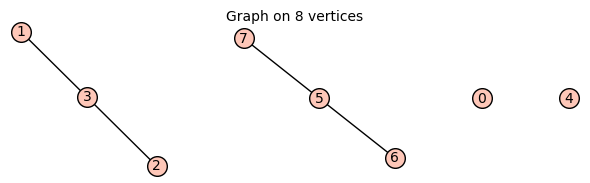

In [46]:
to_sage(grafica_aleatoria(8,0.1))

## Soluciones

#### Decidir si una gráfica es conexa.

In [ ]:
def es_conexa(G):
    n = len(G)
    
    if n < 2: return True
    explorados = [0]*n
    dfs_conexa(G,0,explorados)
    return 0 not in explorados
    

In [ ]:
def dfs_conexa(G,v,explorados):
    explorados[v] = 1
    for u in G[v]:
        if explorados[u] == 0:
            dfs_conexa(G,u,explorados)